<a href="https://colab.research.google.com/github/pkwbim/ai-learning/blob/master/chou_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

In [10]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [11]:

trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

automobile


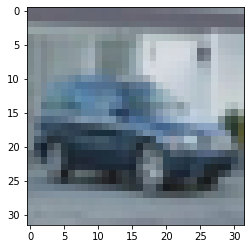

In [12]:

import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])

In [13]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64（個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128（個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [14]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [15]:
x_train_norm = x_train / 255 
x_test_norm = x_test / 255 

In [8]:

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
            ModelCheckpoint("cnn.h5", save_best_only=True),
            EarlyStopping(patience=5, restore_best_weights=True)
]
model.fit(
      x_train_norm, 
      y_train, 
      batch_size=200, 
      validation_split=0.1, 
      epochs = 50 , 
      callbacks = callbacks, 
      verbose= 2
)


Epoch 1/50
225/225 - 3s - loss: 1.8039 - accuracy: 0.3503 - val_loss: 1.3761 - val_accuracy: 0.5068
Epoch 2/50
225/225 - 3s - loss: 1.2806 - accuracy: 0.5488 - val_loss: 1.2212 - val_accuracy: 0.5812
Epoch 3/50
225/225 - 3s - loss: 1.0295 - accuracy: 0.6405 - val_loss: 0.9270 - val_accuracy: 0.6826
Epoch 4/50
225/225 - 3s - loss: 0.8765 - accuracy: 0.6957 - val_loss: 0.8857 - val_accuracy: 0.6990
Epoch 5/50
225/225 - 3s - loss: 0.7455 - accuracy: 0.7427 - val_loss: 0.8384 - val_accuracy: 0.7134
Epoch 6/50
225/225 - 3s - loss: 0.6357 - accuracy: 0.7798 - val_loss: 0.7659 - val_accuracy: 0.7442
Epoch 7/50
225/225 - 3s - loss: 0.5358 - accuracy: 0.8132 - val_loss: 0.7305 - val_accuracy: 0.7558
Epoch 8/50
225/225 - 3s - loss: 0.4469 - accuracy: 0.8423 - val_loss: 0.7456 - val_accuracy: 0.7692
Epoch 9/50
225/225 - 3s - loss: 0.3706 - accuracy: 0.8684 - val_loss: 0.8133 - val_accuracy: 0.7436
Epoch 10/50
225/225 - 3s - loss: 0.3015 - accuracy: 0.8953 - val_loss: 0.7691 - val_accuracy: 0.7698